# FUTURE BEHAVIOURS OF STOCKS


In [118]:
##libraries 

import pandas as pd;import numpy as np
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
import math
plt.style.use('fivethirtyeight')

In [119]:
#get the data for one company
data =pd.read_csv('NASDAQ_100_Data_From_2010.csv', sep='\t')
data = data.loc[data['Name']=='TSLA']
data = data.set_index('Date')
data_TSLA = data.loc[:'2020-12-31',:]
data_TSLA

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-06-29,3.80000,5.000000,3.508000,4.778000,4.778000,93831500,TSLA
2010-06-30,5.15800,6.084000,4.660000,4.766000,4.766000,85935500,TSLA
2010-07-01,5.00000,5.184000,4.054000,4.392000,4.392000,41094000,TSLA
2010-07-02,4.60000,4.620000,3.742000,3.840000,3.840000,25699000,TSLA
2010-07-06,4.00000,4.000000,3.166000,3.222000,3.222000,34334500,TSLA
...,...,...,...,...,...,...,...
2020-12-24,642.98999,666.090027,641.000000,661.770020,661.770020,22865600,TSLA
2020-12-28,674.51001,681.400024,660.799988,663.690002,663.690002,32278600,TSLA
2020-12-29,661.00000,669.900024,655.000000,665.989990,665.989990,22910800,TSLA


<AxesSubplot:xlabel='Date'>

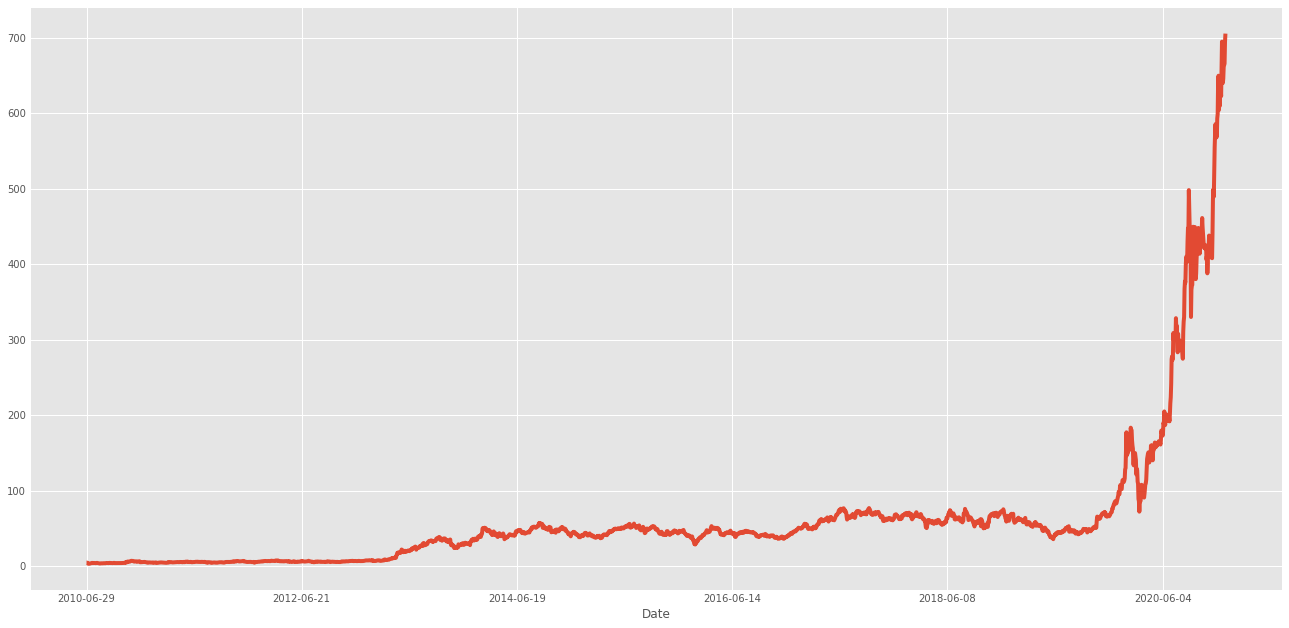

In [120]:
#Plot Historical Data
"""plt.figure(figsize=(20,12))
plt.title('Adjusted Price')
plt.plot(data_TSLA['Adj Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adjusted Price',fontsize=18)
plt.show()"""
mpl.rc('figure', figsize=(20,10))
style.use('ggplot')
data_TSLA['Adj Close'].plot()

In [121]:
#Get Numpy list of data
data_TSLA = data_TSLA.filter(['Adj Close'])
dataset_TSLA = data_TSLA.values
#Get the number of data the model will train on
training_data_len = math.ceil(len(dataset_TSLA)*0.80)

dataset_TSLA

array([[  4.77799988],
       [  4.76599979],
       [  4.3920002 ],
       ...,
       [665.98999023],
       [694.7800293 ],
       [705.66998291]])

In [122]:
#Scale the data
scaler =MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset_TSLA)

scaled_data

array([[0.00230317],
       [0.00228609],
       [0.00175371],
       ...,
       [0.94351683],
       [0.98449851],
       [1.        ]])

In [123]:
#TRAINING DATASET
train_data = scaled_data[0:training_data_len,:]
#Split the data x and y for training

x_train,y_train = [],[]
for i in range(300,len(train_data)):
    x_train.append(train_data[i-300:i,0])
    y_train.append(train_data[i,0])

In [124]:
#CONVERT split datasets to Numpy array
x_train,y_train = np.array(x_train),np.array(y_train)

In [125]:
#Reshape Data Because LSTM input is 3 dimensional howovers Data is two dimensional
x_train = np.reshape(x_train,(1818,300,1))
x_train.shape

(1818, 300, 1)

In [126]:
#Building of LSTM model 
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1))) #return sequences true because of this is a first layer
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [127]:
#Compile model
model.compile(optimizer='adam',loss='mean_squared_error')


In [128]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)#epoch number of iteration when a entire dataset passed forward and backward through a neural network


1818/1818 [==============================] - 163s 88ms/step - loss: 4.3351e-05


In [129]:
#Create testing data set
test_data = scaled_data[training_data_len-300:,:]
#Create data sets x_test and y_test
x_test = []
y_test = dataset_TSLA[training_data_len:,:]

for i in range(300,len(test_data)):
    x_test.append(test_data[i-300:i,0])
     

In [130]:
x_test = np.array(x_test)
x_test.shape

(529, 300)

In [131]:
#Convert the data to the numpy array 
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [132]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)#unscaling


In [133]:
len(predictions)

529

In [134]:
#Got the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

20.50119398133818

C:\Users\Ilkin\AppData\Local\Temp/ipykernel_2916/1520798675.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


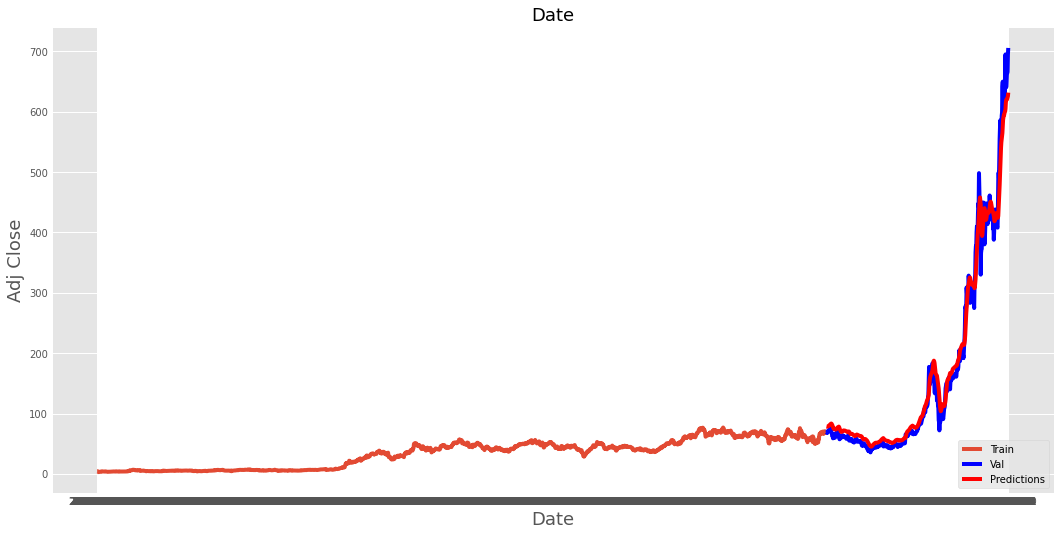

<Figure size 1440x720 with 0 Axes>

In [137]:
#Plot the data
train = data_TSLA[:training_data_len]
valid = data_TSLA[training_data_len:]
valid['Predictions'] = predictions
#Visualize

plt.figure(figsize=(16,8))
plt.title('Model')
plt.title('Date',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid['Adj Close'],color='blue')
plt.plot(valid['Predictions'],color='red')
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()
plt.savefig('myfig')

In [116]:
valid

,Adj Close,Predictions
Date,,
2018-11-26,69.199997,62.836239
2018-11-27,68.783997,62.644035
2018-11-28,69.573997,62.612522
2018-11-29,68.234001,62.767624
2018-11-30,70.096001,62.826836
...,...,...
2020-12-24,661.770020,489.829712
2020-12-28,663.690002,490.750244
2020-12-29,665.989990,492.246185


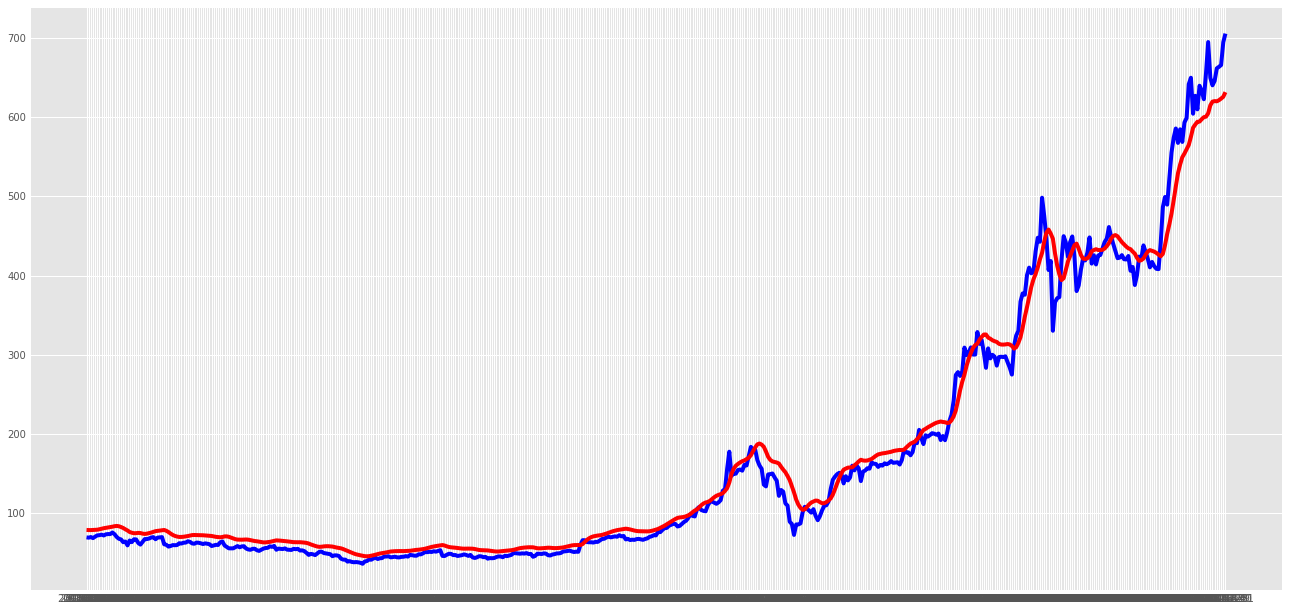

In [138]:
plt.plot(valid['Adj Close'],color='blue')
plt.plot(valid['Predictions'],color='red')
plt.show()